In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [58]:
import pandas as pd
import seaborn as sns

import sklearn.metrics
from sklearn.cross_validation import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [8]:
redshift_file = np.load("data/redshift_mags.npz")
mags, redshifts = redshift_file['mags'][::100], redshift_file['z'][::100]

In [9]:
stacked = np.hstack((mags, redshifts.reshape(redshifts.shape[0], 1)))
col_names = ['u', 'g', 'r', 'i', 'z', 'redshift']
redshift_df = pd.DataFrame(stacked, columns=col_names)
print redshift_df

              u          g          r          i          z  redshift
0     17.150417  15.497092  14.674012  14.234288  13.907544  0.021222
1     20.891638  18.847141  17.699486  17.199553  16.776148  0.125820
2     19.015692  17.501614  16.702612  16.310234  16.004833  0.083186
3     19.261532  18.121223  17.545296  17.228493  17.055941  0.025183
4     19.761936  18.341272  17.586456  17.178825  16.867146  0.082105
5     17.973469  16.164104  15.348441  14.945671  14.608737  0.037611
6     18.638084  16.765795  15.823206  15.348632  14.965608  0.094902
7     19.089142  17.777235  17.347298  17.089390  16.987057  0.033712
8     19.072569  17.670670  16.918528  16.515005  16.247639  0.087895
9     19.112446  17.114983  16.110388  15.656266  15.271649  0.110249
10    20.496025  18.589727  17.414009  16.925301  16.514797  0.160985
11    19.980770  18.527195  17.616690  17.218946  16.882959  0.152071
12    19.261761  17.646940  17.068640  16.685247  16.650362  0.109966
13    19.514725  18.

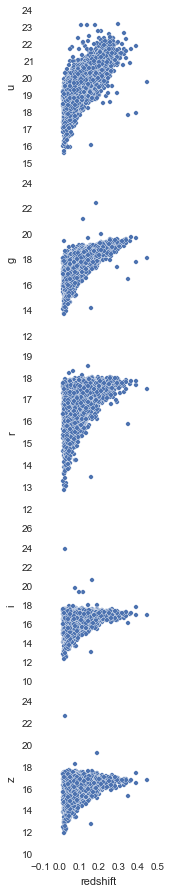

In [10]:
sns.pairplot(redshift_df, x_vars=col_names[-1], y_vars=col_names[:-1], palette='husl')

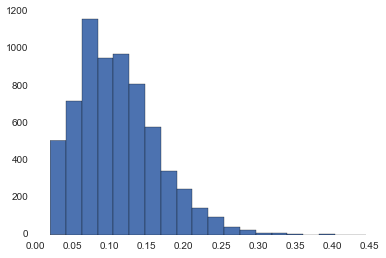

In [27]:
n, bins, patches = plt.hist(redshift_df['redshift'], bins=20)

In [30]:
colors_train, colors_test, redshift_train, redshift_test = train_test_split(mags, redshifts, 
                                                                            test_size=0.25, random_state=13)

##Compute Results

In [49]:
def compute_results(y_true, y_pred):
    
    explained_var = sklearn.metrics.explained_variance_score(y_true, y_pred)
    mean_abs_error = sklearn.metrics.mean_absolute_error(y_true, y_pred)
    r2_score = sklearn.metrics.r2_score(y_true, y_pred)
    mean_squared_error = sklearn.metrics.mean_squared_error(y_true, y_pred)
    
    results = {'scores': [explained_var, mean_abs_error, r2_score, mean_squared_error]}
    return results

##Models

In [50]:
def decision_tree_regression(x_train, y_train, x_test, y_test):
    d_tree = DecisionTreeRegressor(max_depth=8)
    d_tree.fit(x_train, y_train)
    predicted = d_tree.predict(x_test)
    return compute_results(y_test, predicted)

In [53]:
def random_forest_regression(x_train, y_train, x_test, y_test):
    rf = RandomForestRegressor(n_estimators=10,max_depth=8)
    rf.fit(x_train, y_train)
    predicted = rf.predict(x_test)
    return compute_results(y_test, predicted)

In [59]:
def linear_regression(x_train, y_train, x_test, y_test):
    lr = LinearRegression(fit_intercept=True)
    lr.fit(x_train, y_train)
    predicted = lr.predict(x_test)
    return compute_results(y_test, predicted)

In [65]:
def run_models(x_train, y_train, x_test, y_test):
    results = dict()
    
    #RUN Models
    
    #Linear Regression
    lr_results = linear_regression(x_train, y_train, x_test, y_test)
    results['LR'] = lr_results
    
    #Decision Tree
    d_tree_results = decision_tree_regression(x_train, y_train, x_test, y_test)
    results['D Tree'] = d_tree_results
    
    
    #Random Forest
    rf_results = decision_tree_regression(x_train, y_train, x_test, y_test)
    results['RF'] = rf_results
    
    # Print reports
    scores = []
    models = []
    for model, results_dict in results.items():
        models.append(model)
        scores.append(results_dict['scores'])
    
    column_names = ['Explained Variance', 'Mean Absolute Error', 'R2 Score', 'Mean Squared Error']
    score_df = pd.DataFrame(scores, columns=column_names, index=models)
    print score_df
    

In [66]:
run_models(colors_train, redshift_train, colors_test, redshift_test)

        Explained Variance  Mean Absolute Error  R2 Score  Mean Squared Error
D Tree            0.647612             0.023903  0.647612            0.001071
LR                0.655654             0.022644  0.655337            0.001047
RF                0.655495             0.023727  0.655492            0.001047
